In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Random ForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import StratifiedKFold


import warnings
warnings.filterwarnings('ignore')

In [133]:
train_org= pd.read_csv('Loan-train.csv')
test_org= pd.read_csv('loan-test.csv')
train_org.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
train=train_org.copy()
test=test_org.copy()

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [136]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

## Exploratory data analysis

In [137]:
train.Loan_Status.value_counts(normalize = True)*100     # 68.7 of the loan status is Yes%

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

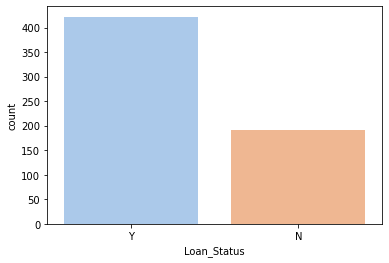

In [138]:
sns.countplot(train['Loan_Status'],label="Count",palette = 'pastel')
plt.show()

Text(0.5, 0, 'Loan_Amount_Term')

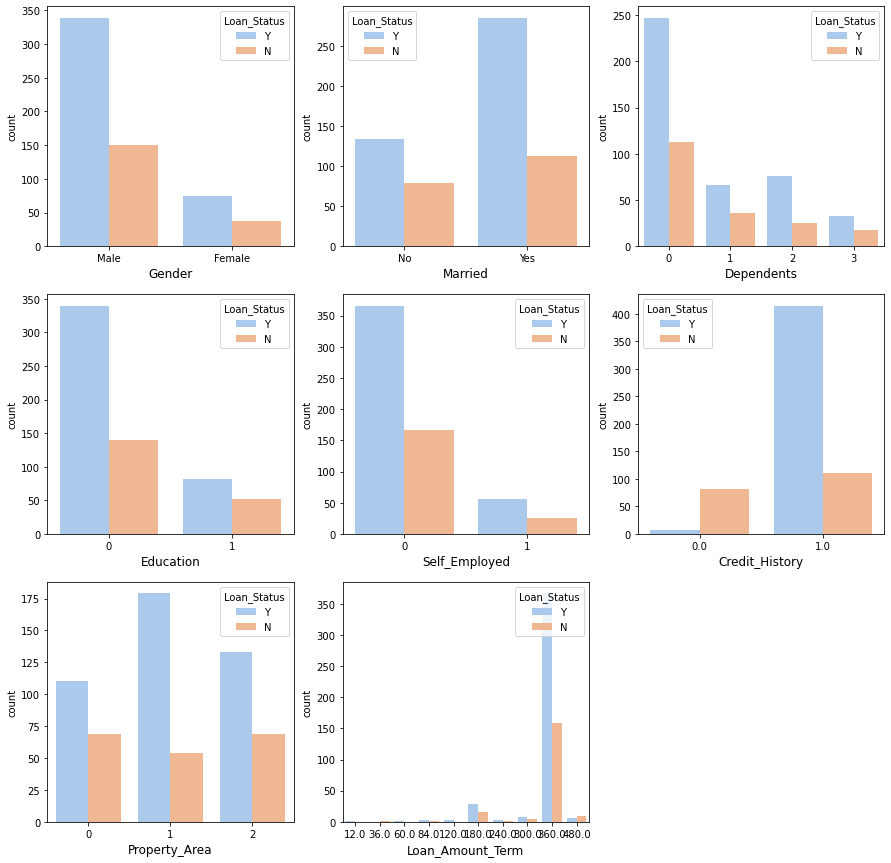

In [139]:
#Categorical Variables

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.countplot(x='Gender', hue='Loan_Status', data=train, palette='pastel')
plt.xlabel("Gender", fontsize=12)

plt.subplot(3,3,2)
sns.countplot(x='Married', hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Married", fontsize=12)

plt.subplot(3,3,3)
sns.countplot(x=loan['Dependents'], hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Dependents", fontsize=12)

plt.subplot(3,3,4)
sns.countplot(x=loan['Education'], hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Education", fontsize=12)

plt.subplot(3,3,5)
sns.countplot(x=loan['Self_Employed'],hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Self_Employed", fontsize=12)

plt.subplot(3,3,6)
sns.countplot(x=loan['Credit_History'], hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Credit_History", fontsize=12)

plt.subplot(3,3,7)
sns.countplot(x=loan['Property_Area'],hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Property_Area", fontsize=12)

plt.subplot(3,3,8)
sns.countplot(x=loan['Loan_Amount_Term'],hue='Loan_Status',data=train, palette='pastel')
plt.xlabel("Loan_Amount_Term", fontsize=12)


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

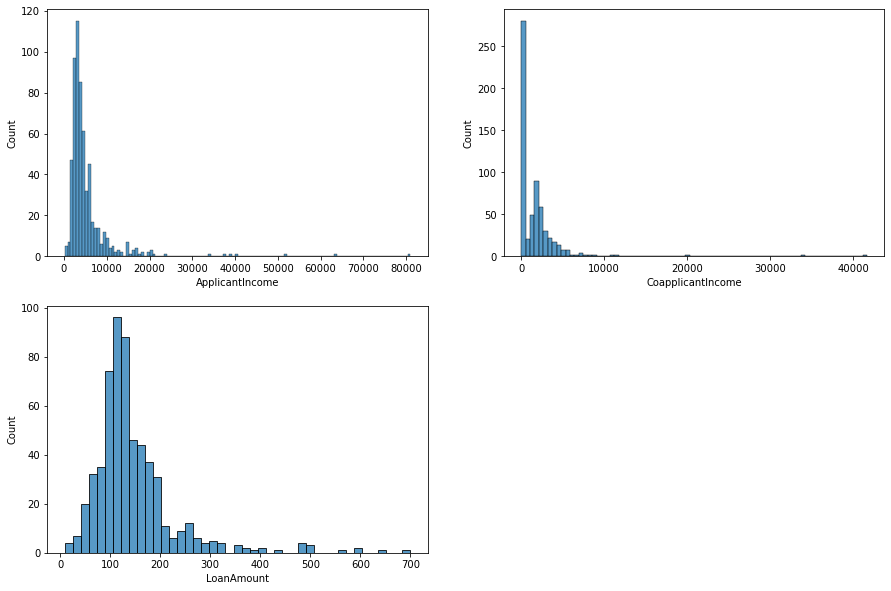

In [140]:
#Numerical Variables

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(x=train['ApplicantIncome'], label="ApplicantIncome" ,palette='deep')

plt.subplot(2,2,2)
sns.histplot(x=train['CoapplicantIncome'], label="CoapplicantIncome" ,palette='deep')

plt.subplot(2,2,3)
sns.histplot(x=train['LoanAmount'], label="LoanAmount" ,palette='deep')

# The variables have outliers (Right skewness in Applicantincome and Coapplicantincome) --> To remove the outliers I will perform log funtion.

# Preprocessing
 1. Drop Loan_ID column
 2. Replace Missing Values
 3. Standardization: Log normalization
 4. Label Encoding Categrical variables

### 1. Drop Loan_ID

In [141]:
train.drop('Loan_ID', axis = 1, inplace=True)
test.drop('Loan_ID', axis = 1, inplace=True)

### 2. Replace Missing Values

In [142]:
train.isnull().values.sum() # there are 149 NaNs in the dataset
test.isnull().values.sum() # there are 84 NaNs in the dataset

# in Categorical variables, replacing the NaNs with mode value
for col in categorical_columns:
    train[col].fillna(train[col].mode()[0],inplace=True)

for col in categorical_columns:
    test[col].fillna(test[col].mode()[0],inplace=True)
    
    
# in Numeric variables, replcing NaNs with mean values of each variable
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())

train.isnull().values.sum() # there are 0 NaNs in the dataset
test.isnull().values.sum() # there are 0 NaNs in the dataset

0

In [143]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### 3. Standardization using log Function

In [144]:
# Since there are many zeroes in CoApplicantIncome variable, I combined ApplicationIncome and CoapplicationIncome as TotalApplicantIncome
train['TotalApplicantIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
test['TotalApplicantIncome']=test['ApplicantIncome']+test['CoapplicantIncome']

# Applying log function on TotalApplicantIncome & LoanAmount
train['TotalApplicantIncome_log']=np.log(train['TotalApplicantIncome'])    
train['LoanAmount_log']=np.log(train['LoanAmount'])

test['TotalApplicantIncome_log']=np.log(test['TotalApplicantIncome'])    
test['LoanAmount_log']=np.log(test['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

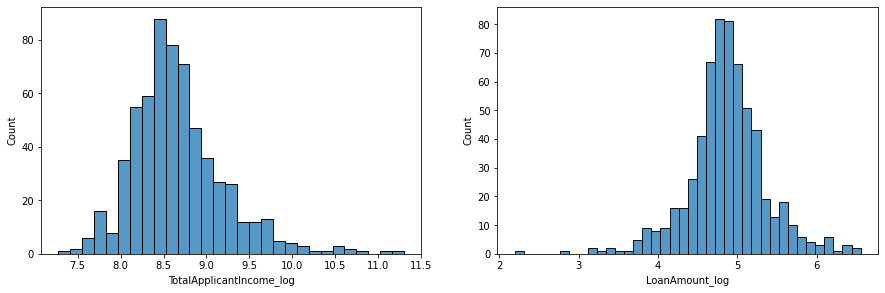

In [147]:
# Plotting Numerical Variables
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(x=train['TotalApplicantIncome_log'], label="TotalApplicantIncome_log" ,palette='deep')
plt.subplot(2,2,2)

sns.histplot(x=train['LoanAmount_log'], label="LoanAmount_log" ,palette='deep')

### 4. Label Encoding

In [148]:
# We need to change categorical variables into some numeric values to make them ready for training our models.
labelencoder = LabelEncoder()
train['Gender'] = labelencoder.fit_transform(train['Gender'])
train['Married'] = labelencoder.fit_transform(train['Married'])
train['Dependents'] = labelencoder.fit_transform(train['Dependents'])
train['Education'] = labelencoder.fit_transform(train['Education'])
train['Self_Employed'] = labelencoder.fit_transform(train['Self_Employed'])
train['Property_Area'] = labelencoder.fit_transform(train['Property_Area'])
train['Loan_Status'] = labelencoder.fit_transform(train['Loan_Status'])



test['Gender'] = labelencoder.fit_transform(test['Gender'])
test['Married'] = labelencoder.fit_transform(test['Married'])
test['Dependents'] = labelencoder.fit_transform(test['Dependents'])
test['Education'] = labelencoder.fit_transform(test['Education'])
test['Self_Employed'] = labelencoder.fit_transform(test['Self_Employed'])
test['Property_Area'] = labelencoder.fit_transform(test['Property_Area'])

train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,TotalApplicantIncome_log,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655


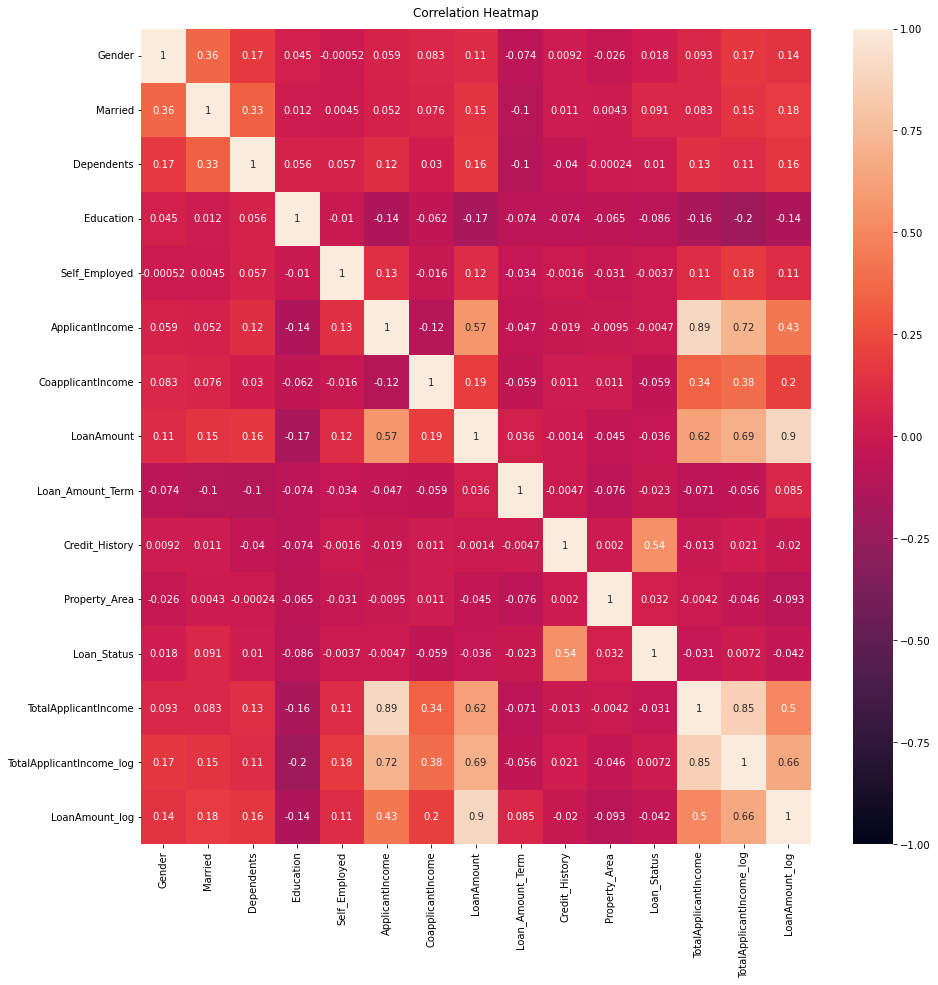

In [149]:
#Heatmap
fig = plt.figure(figsize=(15,15))
heatmap=sns.heatmap(train.corr(),vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Feature Engineering

In [150]:
# According to the heatmap,There is not highly correlated varibales 
# The most correlate variables are ApplicantIncome — LoanAmount and Credit_History — Loan_Status
# since we have new variables (log-variables) we can remove the old ones

train=train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

# Models
 - Logistic Regression
 - Decision Tree
 - Random Forest

In [168]:
#Splitting the data into training and test
X=train.drop(columns='Loan_Status')
y=train['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Logistic Regression

In [152]:
# importing the Model
reg=LogisticRegression()

# fitting the model
reg_model = reg.fit(X_train, y_train)

# prediction
reg_pred = reg_model.predict(X_test)

#Accuracy Score
reg_acc_scores = accuracy_score(y_test, reg_pred)
reg_conf_matrix = confusion_matrix(y_test, reg_pred)

print("Accuracy of Logistic Classifier:", reg_acc_scores*100,'\n')
print(classification_report(y_test, reg_pred_model))

Accuracy of Logistic Classifier: 82.70270270270271 

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        51
           1       0.83      0.94      0.88       134

    accuracy                           0.82       185
   macro avg       0.80      0.73      0.75       185
weighted avg       0.82      0.82      0.81       185



In [153]:
pred_test = reg_model.predict(test)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### Logistic Regression & Stratified k-folds cross-validation

In [162]:
from sklearn.model_selection import StratifiedKFold

i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 10 
accuracy_score 0.7903225806451613

2 of kfold 10 
accuracy_score 0.8387096774193549

3 of kfold 10 
accuracy_score 0.8548387096774194

4 of kfold 10 
accuracy_score 0.8064516129032258

5 of kfold 10 
accuracy_score 0.819672131147541

6 of kfold 10 
accuracy_score 0.7540983606557377

7 of kfold 10 
accuracy_score 0.7868852459016393

8 of kfold 10 
accuracy_score 0.8360655737704918

9 of kfold 10 
accuracy_score 0.8032786885245902

10 of kfold 10 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.8077207826546801


## Decision Tree

In [173]:
# importing the Model
tree_clf=DecisionTreeClassifier()

# fitting the model
tree_model = tree_clf.fit(X_train, y_train)

# prediction
tree_pred = tree_model.predict(X_test)

#Accuracy Score
tree_acc_scores = accuracy_score(y_test, tree_pred)
tree_conf_matrix = confusion_matrix(y_test, tree_pred)

print("Accuracy of Decision Tree Classifier:", tree_acc_scores*100,'\n')
print(classification_report(y_test, tree_pred_model))

Accuracy of Decision Tree Classifier: 66.48648648648648 

              precision    recall  f1-score   support

           0       0.42      0.57      0.48        51
           1       0.81      0.70      0.75       134

    accuracy                           0.66       185
   macro avg       0.62      0.64      0.62       185
weighted avg       0.70      0.66      0.68       185



In [174]:
pred_test = tree_model.predict(test)
pred_test

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,

### Decision Tree & Stratified k-folds cross-validation

In [165]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = tree.DecisionTreeClassifier(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 10 
accuracy_score 0.7903225806451613

2 of kfold 10 
accuracy_score 0.7419354838709677

3 of kfold 10 
accuracy_score 0.7419354838709677

4 of kfold 10 
accuracy_score 0.5967741935483871

5 of kfold 10 
accuracy_score 0.8032786885245902

6 of kfold 10 
accuracy_score 0.6721311475409836

7 of kfold 10 
accuracy_score 0.5901639344262295

8 of kfold 10 
accuracy_score 0.7868852459016393

9 of kfold 10 
accuracy_score 0.6557377049180327

10 of kfold 10 
accuracy_score 0.6885245901639344

 Mean Validation Accuracy 0.7067689053410893


## Random Forest

In [175]:
# importing the Model
rf_clf= RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)

# fitting the model
rf_model = rf_clf.fit(X_train, y_train)

# prediction
rf_pred = rf_model.predict(X_test)

#Accuracy Score
rf_acc_scores = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("Accuracy of Random Forest Classifier:", rf_acc_scores*100,'\n')
print(classification_report(y_test, rf_pred_model))

Accuracy of Random Forest Classifier: 81.62162162162161 

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



In [177]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 10 
accuracy_score 0.8064516129032258

2 of kfold 10 
accuracy_score 0.8064516129032258

3 of kfold 10 
accuracy_score 0.8548387096774194

4 of kfold 10 
accuracy_score 0.7903225806451613

5 of kfold 10 
accuracy_score 0.8360655737704918

6 of kfold 10 
accuracy_score 0.7540983606557377

7 of kfold 10 
accuracy_score 0.7704918032786885

8 of kfold 10 
accuracy_score 0.7704918032786885

9 of kfold 10 
accuracy_score 0.7540983606557377

10 of kfold 10 
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.7946589106292966


# Recursive Feature Selection (RFE)

In [178]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [180]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=8)

In [181]:
rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True False False  True  True False  True  True]
[2 1 1 1 1 3 4 1 1 5 1 1]


In [182]:
insignificant_pred = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] > 1]

for ranking in insignificant_pred:
    insignificant_var = X_train.columns[ranking]
    print(insignificant_var)

Gender
LoanAmount
Loan_Amount_Term
TotalApplicantIncome


In [183]:
ranking = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] < 2]
ranking

[1, 2, 3, 4, 7, 8, 10, 11]

In [184]:
X_train_final = pd.DataFrame()
for index in ranking:
    col_name=X_train.columns[index]
    X_train_final[col_name]=X_train.iloc[:, index]

In [185]:
X_test_final = X_test.copy()
X_test_final.drop(['Gender', 'LoanAmount', 'Loan_Amount_Term','TotalApplicantIncome'], axis=1, inplace=True)

In [186]:
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train)

LogisticRegression()

In [187]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



# Conclusion

I used three different models to predict the loan status; Logistic Regression, Decision Tree, and Random Forest. Among all the models, Logistic Regression has the highest accuracy, 82.7%. Moreover, to check how robust the models are, I used Stratified k-folds cross-validation for each model. We can see improvements in the Decision tree and random forest model. Also, by performing RFE, we can improve the accuracy of the regression model to 83%.